# Sentiment Analysis on Twitter 

In [48]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import json, random 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

## Creating class to preprocess and extract tweets 

In [52]:
class TwitterClient(object):
    
    def __init__(self):
        
        consumer_key = '14LMknT0SShRSyasVolLkzEmX'
        consumer_secret = 'EjKm8x3mnOpdHi3pEPf1Wl9yRMtX6ndbgKWoStnm9iuSFiC54E'
        access_token = '447757580-cIGLLTjmTlALvYCNsW0QYYgcQVD9oMBDdVHynBYP'
        access_token_secret = '3mGoBneQnVpHtm3wn0sZm2cy7JpaDzqWY9Jcyp9wYguhG'
        
        try: 
                # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
                # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
                # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed")
            
            
    def tweet_clean(self, tweet): 
        # removing @ replies and mentions in the tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def analyze_sentiment(self, tweet): 
 
        blob = TextBlob(self.tweet_clean(tweet)) 
        
        if blob.sentiment.polarity > 0: 
            return 'positive'
        elif blob.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
        
    def fetch_tweets(self, query, count = 10):
        
        
        
            # list to store parsed tweets 
            tweets = [] 


            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count) 

                # parsing tweets one by one 
            for tweet in fetched_tweets: 

                parsed_tweet = {} 
                    
                if tweet.lang == "en":

                    # saving text and sentiment of tweets
                    parsed_tweet['text'] = tweet.text  
                    parsed_tweet['sentiment'] = self.analyze_sentiment(tweet.text) 

                    # appending parsed tweet to tweets list 
                    if tweet.retweet_count > 0: 
                        # if tweet has retweets, ensure that it is appended only once 
                        if parsed_tweet not in tweets: 
                                tweets.append(parsed_tweet) 
                    else: 
                        tweets.append(parsed_tweet)  
            return tweets  

## Create a twitter Client object and map sentiments with tweets

In [71]:
api = TwitterClient() 

tweets = api.fetch_tweets(query = '#KFC', count = 600) 

pve = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
 
pp = 100*len(pve)/len(tweets)
print("Positive tweets percentage: {} %".format(pp))

nve = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
 
nn = 100*len(nve)/len(tweets)
print("Negative tweets percentage: {} %".format(nn))

ne = 100 - pp - nn
print("Neutral tweets percentage : {} %".format(ne))

Positive tweets percentage: 26.760563380281692 %
Negative tweets percentage: 19.718309859154928 %
Neutral tweets percentage : 53.52112676056338 %


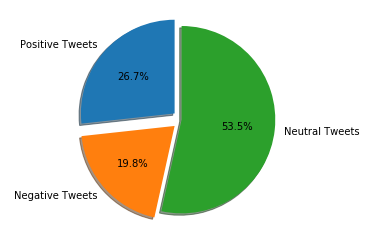

In [73]:
labels = 'Positive Tweets','Negative Tweets','Neutral Tweets'
sizes = [round(pp),round(nn),round(ne)]
explodes = (0.1,0.1,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

## Print few positive and negative tweets 

In [74]:
print("\nPositive tweets:") 
for tweet in pve[:10]: 
    print(tweet['text']) 
    
print("\nNegative tweets:") 
for tweet in nve[:10]: 
    print(tweet['text'],'\n') 


Positive tweets:
@nbc6 Discrimination in Hialeah is real for American born citizens to work. How can they be discriminated against f… https://t.co/GlI5fYEA5K
@Dangchick1 Not #KFC kind
@kfccolombia  del cc Santafé cada día de mal en peor. La semana pasada no había pollo original y hoy no había ni ar… https://t.co/R9nCqdKmBO
RT @KFC_CDI: Special du Mardi
À ne pas pas manquer!
#KFC, it's finger lickin' good. https://t.co/ech9r6TFXy
I thoroughly enjoy the coating of the KFC Hot Wings, if they could replicate this coating, and distribute it to all… https://t.co/p3jfOtEa5u
#Kfc 
Tuesday special 6pieces R65
Please give me it.
Would you love to a Cold_Drink and donate R2?
Yes
_
Ok it will… https://t.co/rqisYqZIF6
First KFC ever! #SaltLakeCity #KFC #KentuckyFriedChicken @kfc @HarmanCafe https://t.co/c32qlBDr4m
RT @PuritySlavulj: Purity's podcast - Episode 41

Today we talk about #KFC's 🍗 #ColonelSanders 👴 new look, trend of #biglips 💋 that makes y…
Purity's podcast - Episode 41

Today we talk 

## Generate Word Cloud 

In [88]:
for tweet in pve: 
    s1 = " ".join(tweet['text'] for tweet in pve)
for tweet in nve:
    s2 = " ".join(tweet['text'] for tweet in pve)
    
stopwords = ['https','co','com','this','to','it','they','for','with','how','and','of','the','in']


In [89]:
wordcloud = WordCloud(
            font_path = r'C:\Users\murta\Desktop\MotionPicture.ttf',
            background_color='black',
            max_words = 500,
            stopwords = stopwords,
            width = 1000,
            height = 1000
        ).generate(s1+s2)

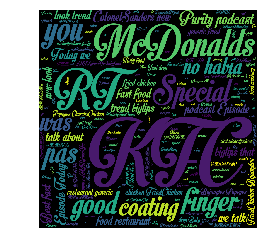

In [90]:
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(r'C:\Users\murta\Desktop\tweetcloud2.png', dpi=300)
plt.show()